In [2]:
import glob
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/metadata/DF_no_speech_yamnet_pred_multi_th.csv')

In [4]:
df

,filename,pred_th_0.5,pred_th_0.3,pred_th_0.1
0,VZ6jhnbk-5g.000.wav,8.634413e-08,8.634413e-08,8.634413e-08
1,RtbBc9kI6tE.000.wav,3.891468e-03,1.315951e-03,8.634413e-08
2,6uqXoPJSoPg.001.wav,8.634413e-08,8.634413e-08,8.634413e-08
3,4JjpfL4y3XM.003.wav,2.431922e-01,2.933971e-01,8.634413e-08
4,WRz1F6DqmRQ.001.wav,3.626963e-02,9.210454e-02,8.634413e-08
...,...,...,...,...
9993,7ZnijRlK5-E.005.wav,1.301609e-02,1.131567e-02,8.634413e-08
9994,eZwGkhUa0TQ.002.wav,6.343809e-02,1.778758e-01,1.188836e-01
9995,HEHMW0uiFa4.001.wav,7.954688e-01,5.991518e-01,4.833292e-01
9996,simc6hmrUOE.001.wav,4.150459e-01,3.467738e-01,8.725315e-03


In [5]:
th_50=df[df['pred_th_0.5']<0.01].shape[0]
th_30=df[df['pred_th_0.3']<0.01].shape[0]
th_10=df[df['pred_th_0.1']<0.01].shape[0]

In [6]:
print('Threshold 0.1 & pred < 0.01: %d\nThreshold 0.3 & pred < 0.01: %d\nThreshold 0.5 & pred < 0.01: %d' % (th_10,th_30,th_50))

Threshold 0.1 & pred < 0.01: 6922
Threshold 0.3 & pred < 0.01: 2319
Threshold 0.5 & pred < 0.01: 1399


<AxesSubplot:xlabel='pred_th_0.1', ylabel='Count'>

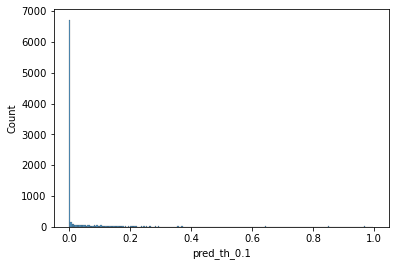

In [7]:
sns.histplot(df['pred_th_0.1'])

<AxesSubplot:xlabel='pred_th_0.3', ylabel='Count'>

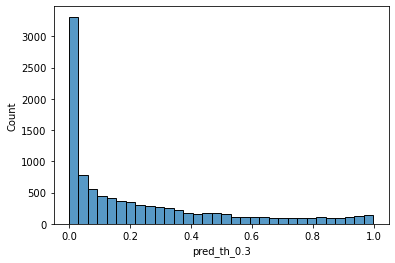

In [8]:
sns.histplot(df['pred_th_0.3'])

<AxesSubplot:xlabel='pred_th_0.5', ylabel='Count'>

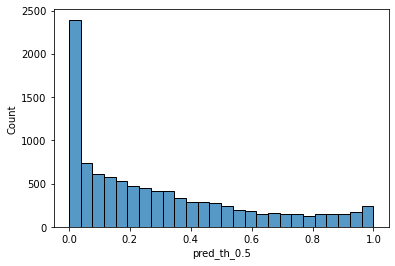

In [9]:
sns.histplot(df['pred_th_0.5'])

In [28]:
df_10=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/egemaps_silero_no_speech_th_0.1.csv')
df_30=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/egemaps_silero_no_speech_th_0.3.csv')
df_50=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/new_partitions-egemaps_silero_no_speech.csv')

df_10=pd.merge(df,df_10,right_on='Name',left_on='filename').drop(columns=['pred_th_0.5','pred_th_0.3'])
df_30=pd.merge(df,df_30,right_on='Name',left_on='filename').drop(columns=['pred_th_0.5','pred_th_0.1'])
df_50=pd.merge(df,df_50,right_on='Name',left_on='filename').drop(columns=['pred_th_0.3','pred_th_0.1'])

df_50=df_50[df_50['pred_th_0.5']<0.01]
df_30=df_30[df_30['pred_th_0.3']<0.01]
df_10=df_10[df_10['pred_th_0.1']<0.01]

In [36]:
print('Threshold 0.5 - Speech prob < 0.01\nN samples: %d\nNaN: %d' % (df_50.shape[0],df_50['F0semitoneFrom27.5Hz_sma3nz_amean'].isna().sum()))
print('Threshold 0.3 - Speech prob < 0.01\nN samples: %d\nNaN: %d' % (df_30.shape[0],df_30['F0semitoneFrom27.5Hz_sma3nz_amean'].isna().sum()))
print('Threshold 0.1 - Speech prob < 0.01\nN samples: %d\nNaN: %d' % (df_10.shape[0],df_10['F0semitoneFrom27.5Hz_sma3nz_amean'].isna().sum()))

Threshold 0.5 - Speech prob < 0.01
N samples: 1399
NaN: 0
Threshold 0.3 - Speech prob < 0.01
N samples: 2319
NaN: 836
Threshold 0.1 - Speech prob < 0.01
N samples: 6922
NaN: 6186
